In [1]:
SHOW_PLOT_FLAG = True

In [2]:
import sys

sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from constants import *
import matplotlib.gridspec as gridspec


# Figure 3

## Loading Data (Per seconds)

In [3]:
O_Sp90 = pd.read_csv('CuratedData/O_Sp90_REs.txt', sep='\t')
O_Sp100 = pd.read_csv('CuratedData/O_Sp100_REs.txt', sep='\t')
V_Sp = pd.read_csv('CuratedData/V_Sp_REs.txt', sep='\t')

cdf = [V_Sp,  O_Sp90, O_Sp100]
x = 'REs'

## Plotting Data

Showing Plot  Sec4_Fig3


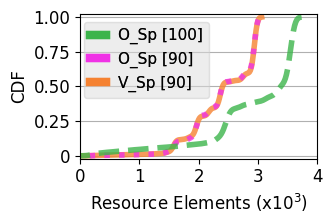

In [4]:
fig = plt.figure(figsize=(3, 1.9))
gs1 = gridspec.GridSpec(1, 1, wspace=0.1, hspace=0.08, top=.99, bottom=0.23, left=0.2, right=0.99, figure=fig)
  
ax0 = plt.subplot(gs1[0])

for i in range(len(cdf)):
    if i == 0:
        c = colors['ITL1']
        cf = '$V_{Sp}$[90Mhz]'
        df = cdf[i]
        ls='-'
    elif i == 1:
        c = colors['GER1']
        cf = '$O_{Sp}$[90Mhz]'
        df = cdf[i]
        ls=':'
    elif i == 2:
        c = colors['US1']
        cf = '$O_{Sp}$[100Mhz]'
        df = cdf[i]
        ls='--'
    ax0 = sns.kdeplot(df[x], common_norm=False, cumulative=True, linestyle=ls, color=c, alpha=0.8, lw=4, bw_adjust=1, label=cf)

ax0.set_ylim([-0.02,1.02])
ax0.set_xlim([0, 4000])
ax0.yaxis.grid(True, which='major')

ax0.set_ylabel('CDF', fontsize=12)
ax0.set_xlabel('Resource Elements (x$10^{3}$)', fontsize=12)
ax0.set_yticks([0, 0.25, 0.50, 0.75, 1.00])
ax0.set_yticklabels(['0', '0.25', '0.50', '0.75', '1.00'], fontsize=12)
ax0.set_xticks([i for i in range(0, 4001, 1000)])
ax0.set_xticklabels([0, 1, 2, 3, 4], fontsize=12)

h1, = plt.plot([-100, -100], linestyle='-', color=colors['US1'], lw=6)
h2, = plt.plot([-1000, -1000], linestyle='-', color=colors['GER1'], lw=6)
h3, = plt.plot([-1000, -1000], linestyle='-', color=colors['ITL1'], lw=6)

legend1 = ax0.legend((h1, h2, h3), ('O_Sp [100]', 'O_Sp [90]', 'V_Sp [90]'), columnspacing=1, loc='upper center', ncol=1,
                     bbox_to_anchor=(0.28, 1.0), facecolor='#dddddd',
                     handlelength=1, framealpha=.3, fontsize = 11, markerscale=40)
ax0.add_artist(legend1)

#### Showing plots
plot_name = 'Fig3'
plotme(plt, " Sec4", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)
